## Preprocess model data: 

In [1]:
from pathlib import Path
import matplotlib as mpl
import xarray as xr

In [2]:
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

In [3]:
from pathlib import Path

from bs_fdbck_clean.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck_clean.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck_clean.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck_clean.util.plot.BSOA_plots import make_cool_grid, plot_scatter

import time
import xarray as xr
import matplotlib.pyplot as plt

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/bs_fdbck_clean/data_info
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [7]:
from bs_fdbck_clean.constants import path_measurement_data
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
import numpy as np
import xarray as xr
xr.set_options(keep_attrs=True)

In [9]:
import datetime 

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Some definitions

In [11]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9
temperature = 273.15

In [12]:
model_lev_i=-1
select_station = 'SMR'

In [13]:
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data.mkdir(parents=True, exist_ok=True)

In [14]:
models = ['ECHAM-SALSA','NorESM', 'EC-Earth', 'UKESM']

di_mod2cases = dict()
#for mod in models:
#    di_mod2cases[mod]=dict()

#### Define dictionaries:

In [15]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

## Read in model data. 

### ECHAM SALSA:

In [16]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [17]:
case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]
di_mod2cases[model_name]=cases_echam

#### Variables

In [18]:
varl =[
    'apm',
    'geom',
    'airdens',
    'tempair',
    'uw',
    'vw',
    'ccn02',
    'ccn10',
    'cod',
    'cwp',
    'ceff',
    'ceff_ct',
    'lcdnc',
    'lcdnc_ct',
    'clfr',
    'cl_time',
    'aot550nm',
    'aot865nm',
    'ang550865',
    'up_sw',
    'up_sw_cs',
    'up_sw_noa',
    'up_sw_cs_noa',
    'up_lw',
    'up_lw_cs',
    'up_lw_noa',
    'up_lw_cs_noa',
    'mmrtrN500',
    'mmrtrN250',
    'mmrtrN200',
    'mmrtrN100',
    'mmrtrN50',
    'mmrtrN3',
    'oh_con',
    'emi_monot_bio',
    'emi_isop_bio',
    'SO2_gas',
    'APIN_gas',
    'TBETAOCI_gas',
    'BPIN_gas',
    'LIMON_gas',
    'SABIN_gas',
    'MYRC_gas',
    'CARENE3_gas',
    'ISOP_gas',
    'VBS0_gas',
    'VBS1_gas',
    'VBS10_gas',
    'ORG_mass',
] 

#### Read in ECHAM-SALSA:

In [19]:
model_name

'ECHAM-SALSA'

In [20]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'model_name': 'ECHAM-SALSA', 'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
ECHAM-SALSA
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
ECHAM-SALSA
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
ECHAM-SALSA
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
ECHAM-SALSA
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
ECHAM-SALSA
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS

In [21]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2023-10-20 10:26:33,139 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

{'model_name': 'ECHAM-SALSA', 'history_field': '.h1.', 'use_pressure_coords': False}
ECHAM-SALSA
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
ECHAM-SALSA
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
ECHAM-SALSA
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
ECHAM-SALSA
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
ECHAM-SALSA
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
ECHAM-S

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [22]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

### EC-Earth

In [23]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [24]:
case_name = 'ECE3_output_Sara'
case_name_ec_earth = 'ECE3_output_Sara'
from_time = '2012-01'
to_time = '2019-02'
time_res = 'hour'
space_res='locations'
model_name='EC-Earth'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_ec_earth = [case_name]
di_mod2cases[model_name]=cases_ec_earth

#### Variables

In [25]:
varl =[
    'CCN0.20',
    'CCN1.00',
    'M_SO4NUS',
    'M_SOANUS',
    'M_BCAIS',
    'M_POMAIS',
    'M_SOAAIS',
    'M_SO4ACS',
    'M_BCACS',
    'M_POMACS',
    'M_SSACS',
    'M_DUACS',
    'M_SOAACS',
    'M_SO4COS',
    'M_BCCOS',
    'M_POMCOS',
    'M_SSCOS',
    'M_DUCOS',
    'M_SOACOS',
    'M_BCAII',
    'M_POMAII',
    'M_SOAAII',
    'M_DUACI',
    'M_DUCOI',
    'N_NUS',
    'N_AIS',
    'N_ACS',
    'N_COS',
    'N_AII',
    'N_ACI',
    'N_COI',
    'RWET_NUS',
    'RWET_AIS',
    'RWET_ACS',
    'RWET_COS',
    'RWET_AII',
    'RWET_ACI',
    'RWET_COI',
    'RDRY_NUS',
    'RDRY_AIS',
    'RDRY_ACS',
    'RDRY_COS',
    'od550aer',
    'od550oa',
    'od550soa',
    'od440aer',
    'od870aer',
    'od350aer',
    'loadsoa',
    'emiterp',
    'emiisop',
]
varl_ifs=[
    'var130',

] 

#### Read in EC-Earth:

In [26]:
for case_name in cases_ec_earth:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'model_name': 'EC-Earth', 'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
EC-Earth
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
EC-Earth
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
EC-Earth
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
EC-Earth
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
EC-Earth
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sar

In [27]:
from bs_fdbck_clean.util.BSOA_datamanip.ec_earth import fix_timestamp_ec_earth

In [28]:
dic_ds = dict()
for ca in cases_ec_earth:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
        

    ds_ifs = c.get_collocated_dataset(varl_ifs)


    ds = c.get_collocated_dataset(varl)
    ds = fix_timestamp_ec_earth(ds)
    ds_ifs = ds_ifs.rename({'lev':'lev_ifs'})
    

    ds = xr.merge([ds,ds_ifs])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.copy()

2023-10-20 10:26:37,033 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc]


{'model_name': 'EC-Earth', 'history_field': '.h1.', 'use_pressure_coords': False}
EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
2023-10-20 10:26:37,033 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc]
['//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc']


2023-10-20 10:26:37,150 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_BCAIS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_POMAIS_ECE3_output_Sara_201

EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_BCAIS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_POMAIS_ECE3_output_Sara_2012-

In [29]:
dic_mod_ca['EC-Earth'] = dic_ds.copy()

In [30]:
ds_iso = dic_mod_ca['EC-Earth']['ECE3_output_Sara'][['emiisop','M_SOAACS']].sel(station='SMR')

In [31]:
ds_iso['hour'] = ds_iso['time.hour']
ds_iso

<xarray.Dataset>
Dimensions:    (time: 61369, lev: 34)
Coordinates:
    station    <U3 'SMR'
  * time       (time) datetime64[ns] 2012-01-01 ... 2019-01-01
    time_orig  (time) datetime64[ns] 2012-01-01T00:30:00 ... NaT
  * lev        (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 30.0 31.0 32.0 33.0 34.0
Data variables:
    emiisop    (time) float32 dask.array<chunksize=(61369,), meta=np.ndarray>
    M_SOAACS   (time, lev) float32 dask.array<chunksize=(61369, 34), meta=np.ndarray>
    hour       (time) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23 0

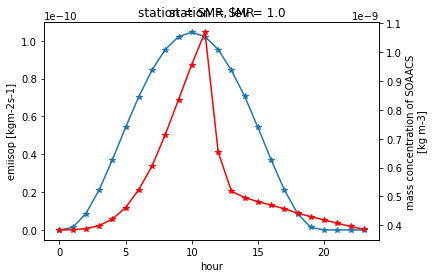

In [32]:
f, ax = plt.subplots()
ds_iso['emiisop'].groupby(ds_iso['hour']).mean().plot(ax = ax, marker='*')
ax2 = ax.twinx()
ds_iso['M_SOAACS'].groupby(ds_iso['hour']).mean().isel(lev= 0).plot(ax = ax2, c='r', marker='*')

### UKESM

In [33]:
case_name_ukesm = 'AEROCOMTRAJ'
case_name = case_name_ukesm
time_res = 'hour'
space_res = 'locations'
model_name = 'UKESM'

from_t = '2012-01-01'
to_t = '2019-01-01'

In [34]:
case_mod = case_name
cases_ukesm = [case_name]
di_mod2cases[model_name]=cases_ukesm

#### Variables

In [35]:
varl = [
    'Mass_Conc_OM_NS',

    'Mass_Conc_OM_KS',
    'Mass_Conc_OM_KI',
    'Mass_Conc_OM_AS',
    'Mass_Conc_OM_CS',
    'mmrtr_OM_NS',
    'mmrtr_OM_KS',
    'mmrtr_OM_KI',
    'mmrtr_OM_AS',
    'mmrtr_OM_CS',
    'nconcNS',
    'nconcKS',
    'nconcKI',
    'nconcAS',
    'nconcCS',
    'ddryNS',
    'ddryKS',
    'ddryKI',
    'ddryAS',
    'ddryCS',
    'Temp',
    'SFisoprene',
    'SFterpene',
]

#### Read in UKESM:

In [36]:
for case_name in cases_ukesm:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'model_name': 'UKESM', 'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
UKESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc exists
UKESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc exists
UKESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc exists
UKESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc exists
UKESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2012-01-01_2019-01

In [37]:
dic_ds = dict()
for ca in cases_ukesm:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
        



    ds = c.get_collocated_dataset(varl)
    

    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    ds = ds.rename({'model_level':'lev'})
    dic_ds[ca]=ds.copy()

2023-10-20 10:26:40,521 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/mmrtr_OM_NS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc,

{'model_name': 'UKESM', 'history_field': '.h1.', 'use_pressure_coords': False}
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/mmrtr

In [38]:
dic_mod_ca['UKESM'] = dic_ds.copy()

In [39]:
_ds = dic_mod_ca['UKESM'][case_name_ukesm].sel(station='SMR')

In [40]:
_ds['hour'] = _ds['time.hour']
_ds

<xarray.Dataset>
Dimensions:          (time: 41408, lev: 85)
Coordinates:
  * time             (time) datetime64[ns] 2012-01-01 ... 2019-01-31T22:30:00
  * lev              (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 82.0 83.0 84.0 85.0
    station          <U3 'SMR'
Data variables: (12/24)
    Mass_Conc_OM_AS  (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    Mass_Conc_OM_CS  (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    Mass_Conc_OM_KI  (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    Mass_Conc_OM_KS  (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    Mass_Conc_OM_NS  (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    SFisoprene       (time) float32 dask.array<chunksize=(41408,), meta=np.ndarray>
    ...               ...
    nconcAS          (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    nconcCS          (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    nconcKI          (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    nconcKS          (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    nconcNS          (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    hour             (time) int64 0 1 3 4 6 7 9 10 ... 12 13 15 16 18 19 21 22

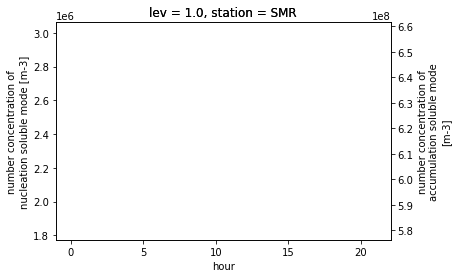

In [41]:
f, ax = plt.subplots()
_ds['nconcNS'].groupby(_ds['hour']).mean().isel(lev= 0).plot(ax = ax)
ax2 = ax.twinx()
_ds['nconcAS'].groupby(_ds['hour']).mean().isel(lev= 0).plot(ax = ax2, c='r')

### NORESM

#### Settings:

In [42]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [43]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [44]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

#### Cases:

In [45]:
cases_noresm1 = ['OsloAero_intBVOC_f09_f09_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f09_f09_mg17_ssp245']

In [46]:
case_mod = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
cases_noresm = [case_noresm]
di_mod2cases['NorESM'] = cases_noresm

#### Variables

In [47]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','SOA_SV',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'DOD500',
      'isoprene',
      'SFisoprene',
       'monoterp',
       'SFmonoterp',
       'PS',
       'NNAT_0',
       #'NCONC00',
       'NCONC02',
       'NCONC03',
       'NCONC04',
       'NCONC05',
       'NCONC06',
       'NCONC07',
       'NCONC08',
       'NCONC09',
       'NCONC10',
       'NCONC11',
       'NCONC12',
       'NCONC13',
       'NCONC14',
       'NMR01',
       #'NMR00',
       #'SIGMA00',
       'SIGMA01',
       'NMR02',
       'SIGMA02',
       'NMR03',
       'SIGMA03',
       'NMR04',
       'SIGMA04',
       'NMR05',
       'SIGMA05',
       'NMR06',
       'SIGMA06',
       'NMR07',
       'SIGMA07',
       'NMR08',
       'SIGMA08',
       'NMR09',
       'SIGMA09',
       'NMR10',
       'SIGMA10',
       'NMR11',
       'SIGMA11',
       'NMR12',
       'SIGMA12',
       'NMR13',
       'SIGMA13',
       'NMR14',
       'SIGMA14',
       #'hyam','hybm',
       'FSNS','FSDS_DRF',
       'FSNSC',
       'FSDSCDRF',
       #'hyai','hybi',
       'N500',
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

#### Read in NorESM

In [48]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
NorESM
Checking if //pr

In [49]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
NorESM


In [50]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

{'history_field': '.h1.', 'use_pressure_coords': False}
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAer

2023-10-20 10:26:43,292 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SIGMA14_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/FSNS_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/FSDS_DRF_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/FSNSC_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/FSDSCDRF_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_loc

In [51]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2023-10-20 10:26:45,528 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

{'history_field': '.h1.', 'use_pressure_coords': False}
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ss

In [52]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [53]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [54]:
dic_ds = {case_mod: ds_comb}

In [55]:
dic_mod_ca['NorESM'] = dic_ds.copy()

In [56]:
ds_comb

<xarray.Dataset>
Dimensions:     (time: 61345, station: 7, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
  * station     (station) object 'SMR' 'HTM' 'VHL' 'BIR' 'ATTO' 'SGP' 'SMR4'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/87)
    ACTREL      (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    BC_A        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AC       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AI       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AX       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_N        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    ...          ...
    SS_A1       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A2       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A3       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    T           (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    isoprene    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    monoterp    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>

## SELECT STATION:


In [57]:
for mod in dic_mod_ca.keys():
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].sel(station=select_station)
        dic_mod_ca[mod][ca].load()

ECHAM-SALSA
EC-Earth
UKESM
NorESM


## Select level: 

In [58]:
for mod in dic_mod_ca.keys():
    if mod in ['EC-Earth', 'UKESM']:
        continue
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev=model_lev_i)
        dic_mod_ca[mod][ca].load()

ECHAM-SALSA
NorESM


In [59]:
for mod in dic_mod_ca.keys():
    if mod not in ['EC-Earth', 'UKESM']:
        continue
    print(mod)
    lev_i_tm5 = -model_lev_i-1
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev=lev_i_tm5)
        if mod=='EC-Earth':
            dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev_ifs=model_lev_i)
        dic_mod_ca[mod][ca].load()




EC-Earth
UKESM


TM5 has model levels going from the ground and up, IFS from the top and down. 

## Adjust ECHAM

In [60]:
rn_dict_echam={
    'ORG_mass_conc' : 'OA',
    'tempair':'T',

    
}

In [61]:
from bs_fdbck_clean.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median, mask4summer,ds2df_echam

In [62]:
standard_air_density = 100*pressure/(R*temperature)

In [63]:
import datetime

### Fix echam time

In [64]:
def fix_echam_time(dt):
    #a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(minutes=dt.minute, seconds = dt.second)
    #nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year, dt.month,dt.day, dt.hour)#dt - tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt

In [65]:
ds_echam = dic_mod_ca['ECHAM-SALSA'][case_name_echam]
air_dens = ds_echam['apm']/(R*ds_echam['tempair'])

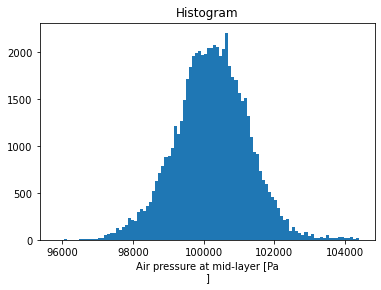

In [66]:
ds_echam['apm'].plot.hist(bins=100);

### Run ds2df_echam

#### Calculation with standard density and pressure:


In [67]:
from bs_fdbck_clean.util.BSOA_datamanip import standard_air_density

In [68]:

df, df_sm = ds2df_echam(dic_mod_ca['ECHAM-SALSA'][case_name_echam], 
                        take_daily_median=False, 
                        air_density=standard_air_density,
                        model_lev_i =model_lev_i)
df.index = df.reset_index()['time'].apply(fix_echam_time)
df

Computing N3 from mmrtrN3
N3
Computing N50 from mmrtrN50
N50
Computing N100 from mmrtrN100
N100
Computing N200 from mmrtrN200
N200
Computing N250 from mmrtrN250
N250
Computing N500 from mmrtrN500
N500
Computing ORG_mass_conc from ORG_mass and convertign units
ORG_mass_conc
Computing VBS1_gas_conc from VBS1_gas and convertign units
VBS1_gas_conc
Computing VBS0_gas_conc from VBS0_gas and convertign units
VBS0_gas_conc
Computing VBS10_gas_conc from VBS10_gas and convertign units
VBS10_gas_conc
Computing OAG
Computing cwp by 
cwp
Converting units from lcdnc_ct


,lon,lev,station,APIN_gas,BPIN_gas,CARENE3_gas,ISOP_gas,LIMON_gas,MYRC_gas,ORG_mass,...,VBS10_gas_conc,OAG,cwp,ceff_um,lcdnc_cm3,lcdnc_ct_cm3,T_C,is_JJA,is_JA,isSummer
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,24.2896,47.0,SMR,1.361203e-11,1.195408e-11,8.112913e-12,6.094467e-13,7.643650e-12,1.722048e-12,1.059090e-10,...,0.002368,0.139519,256.340515,0.0,4.911462e-35,0.0,-5.690857,False,False,False
2012-01-01 01:00:00,24.2896,47.0,SMR,1.526825e-11,1.340976e-11,9.095198e-12,5.985267e-13,8.574262e-12,1.930941e-12,1.198592e-10,...,0.002255,0.157412,220.838120,0.0,8.720350e-35,0.0,-5.732605,False,False,False
2012-01-01 02:00:00,24.2896,47.0,SMR,2.012862e-11,1.768351e-11,1.196703e-11,5.865213e-13,1.130422e-11,2.542114e-12,1.652919e-10,...,0.002311,0.216194,192.647324,0.0,-6.989588e-36,0.0,-5.700928,False,False,False
2012-01-01 03:00:00,24.2896,47.0,SMR,2.654426e-11,2.332372e-11,1.576086e-11,5.750081e-13,1.490835e-11,3.349550e-12,2.306323e-10,...,0.002266,0.300581,166.926910,0.0,1.083489e-34,0.0,-5.572144,False,False,False
2012-01-01 04:00:00,24.2896,47.0,SMR,3.203289e-11,2.814790e-11,1.901204e-11,5.630599e-13,1.799283e-11,4.041667e-12,2.941777e-10,...,0.002129,0.382532,144.410721,0.0,7.350604e-35,0.0,-5.342072,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,24.2896,47.0,SMR,2.225506e-11,1.951626e-11,1.326462e-11,2.384533e-12,1.249081e-11,2.828762e-12,1.578346e-10,...,0.000642,0.204656,63.028210,0.0,2.940085e-35,0.0,-3.349548,False,False,False
2018-12-31 20:00:00,24.2896,47.0,SMR,2.359773e-11,2.072263e-11,1.407822e-11,1.931136e-12,1.326150e-11,3.002594e-12,9.555966e-11,...,0.000505,0.124034,76.085457,0.0,7.577885e-35,0.0,-3.048615,False,False,False
2018-12-31 21:00:00,24.2896,47.0,SMR,2.526455e-11,2.221320e-11,1.507039e-11,1.576099e-12,1.421139e-11,3.217937e-12,6.283594e-11,...,0.000346,0.081576,44.751438,0.0,7.247229e-35,0.0,-2.815002,False,False,False


<AxesSubplot:xlabel='time'>

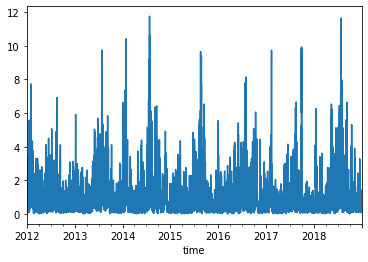

In [69]:
df['OA'].plot()

<AxesSubplot:xlabel='time'>

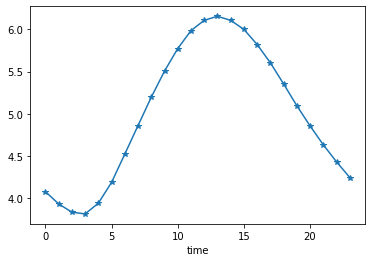

In [70]:
df['T_C'].groupby(df.index.hour).mean().plot(marker='*')

### Save result

In [71]:


_di = {case_name_echam:df}
_dism = {case_name_echam:df_sm}

dic_df_mod_case['ECHAM-SALSA']= _di.copy()
dic_dfsm_mod_case['ECHAM-SALSA'] = _dism.copy()

## Adjust EC-Earth:

In [72]:
ds_ec_earth = dic_mod_ca['EC-Earth'][case_name_ec_earth]

#### Check all data there: 

In [73]:
from bs_fdbck_clean.util.BSOA_datamanip.ec_earth import rad_vars, num_vars

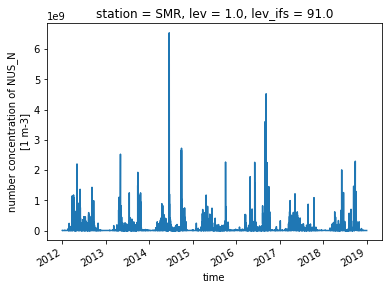

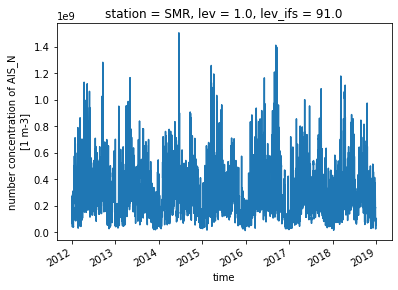

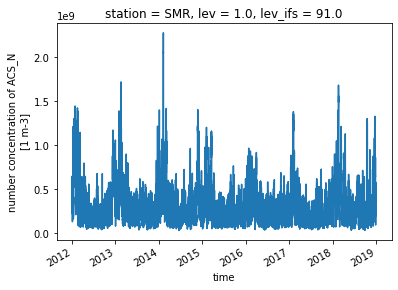

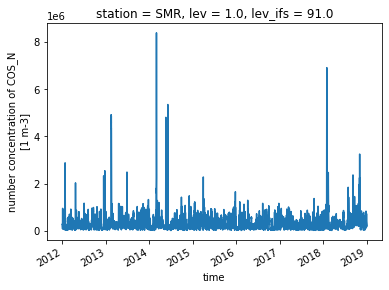

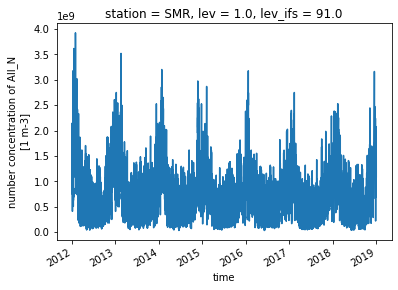

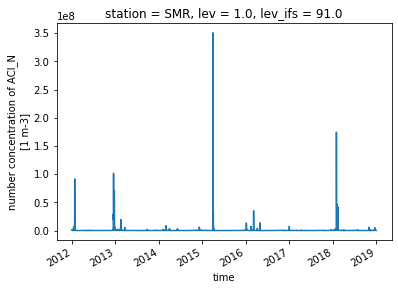

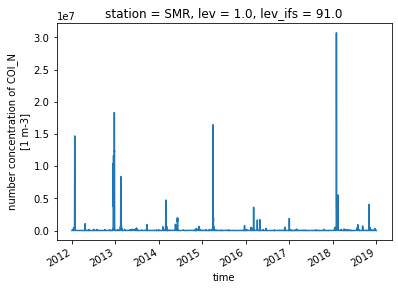

In [74]:
for n in num_vars:
    ds_ec_earth[n].plot()
    plt.show()

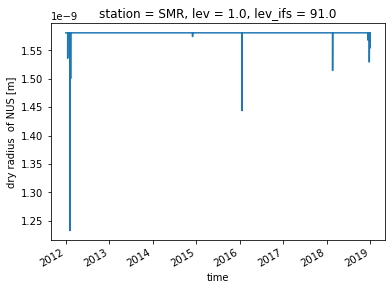

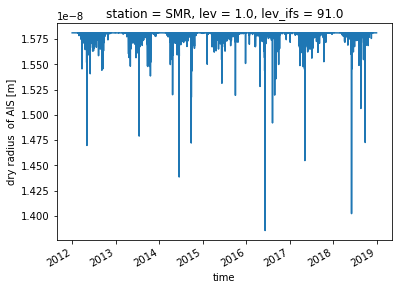

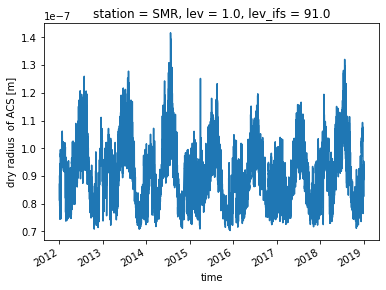

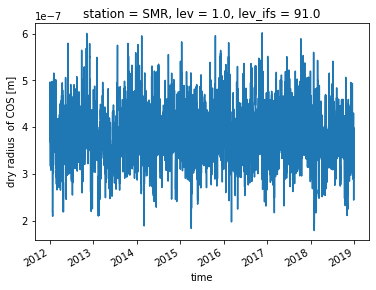

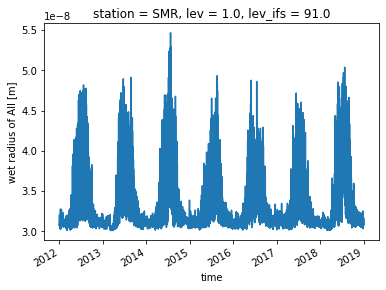

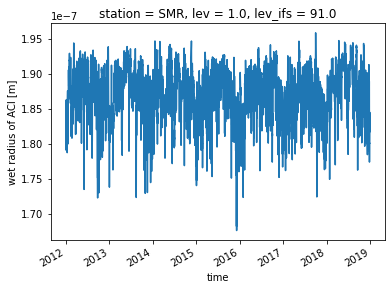

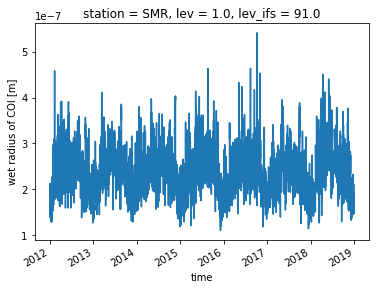

In [75]:
for n in rad_vars:
    ds_ec_earth[n].plot()
    plt.show()

In [76]:
from bs_fdbck_clean.util.BSOA_datamanip.ec_earth import ds2df_ec_earth

In [77]:

df, df_sm = ds2df_ec_earth(ds_ec_earth, 
                        take_daily_median=False, 
                        #air_density=air_dens,
                        model_lev_i =model_lev_i)
#df.index = df.reset_index()['time'].apply(fix_echam_time)
df

Converting N_NUS from m-3 to cm-3
Converting N_AIS from m-3 to cm-3
Converting N_ACS from m-3 to cm-3
Converting N_COS from m-3 to cm-3
Converting N_AII from m-3 to cm-3
Converting N_ACI from m-3 to cm-3
Converting N_COI from m-3 to cm-3
Converting RDRY_NUS from m to nm
Converting RDRY_AIS from m to nm
Converting RDRY_ACS from m to nm
Converting RDRY_COS from m to nm
Converting RWET_AII from m to nm
Converting RWET_ACI from m to nm
Converting RWET_COI from m to nm
Converting M_SOANUS from kg/m3 to ug/m3
Converting M_POMAIS from kg/m3 to ug/m3
Converting M_SOAAIS from kg/m3 to ug/m3
Converting M_POMACS from kg/m3 to ug/m3
Converting M_SOAACS from kg/m3 to ug/m3
Converting M_POMCOS from kg/m3 to ug/m3
Converting M_SOACOS from kg/m3 to ug/m3
Converting M_POMAII from kg/m3 to ug/m3
Converting M_SOAAII from kg/m3 to ug/m3
renaming var130 to temp


,station,time_orig,lev,CCN0.20,CCN1.00,M_BCACS,M_BCAII,M_BCAIS,M_BCCOS,M_DUACI,...,N150-500,N200-500,OA,POM,SOA,SOA2,T_C,is_JJA,is_JA,isSummer
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,SMR,2012-01-01 00:30:00,1.0,210.349487,328.704193,1.312838e-10,1.760822e-10,6.468536e-13,5.554017e-16,2.331612e-10,...,196.935490,101.754681,1.813057,1.737373,0.075684,0.075684,NaN,False,False,False
2012-01-01 01:00:00,SMR,2012-01-01 01:30:00,1.0,238.479065,370.828125,1.479828e-10,2.002312e-10,5.436276e-13,6.121765e-16,2.344173e-10,...,224.057987,116.241666,2.074929,1.999963,0.074966,0.074966,NaN,False,False,False
2012-01-01 02:00:00,SMR,2012-01-01 02:30:00,1.0,264.209625,408.752502,1.637148e-10,2.224790e-10,5.254167e-13,6.354531e-16,2.355444e-10,...,249.143457,129.551621,2.320950,2.244422,0.076527,0.076527,NaN,False,False,False
2012-01-01 03:00:00,SMR,2012-01-01 03:30:00,1.0,289.251404,443.429291,1.786072e-10,2.429668e-10,5.675244e-13,6.503565e-16,2.366023e-10,...,273.240513,142.554836,2.553694,2.472160,0.081534,0.081534,-14.315735,False,False,False
2012-01-01 04:00:00,SMR,2012-01-01 04:30:00,1.0,313.352417,475.294556,1.927297e-10,2.617789e-10,6.486790e-13,6.622721e-16,2.375622e-10,...,296.305901,155.159277,2.774989,2.684082,0.090908,0.090908,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 20:00:00,SMR,2018-12-31 20:30:00,1.0,318.413849,394.142242,1.709785e-10,2.026840e-10,1.881653e-12,8.132766e-16,8.079349e-12,...,282.389702,166.922512,2.239892,2.182843,0.057050,0.057050,NaN,False,False,False
2018-12-31 21:00:00,SMR,2018-12-31 21:30:00,1.0,315.230042,389.781250,1.666865e-10,1.965827e-10,1.886738e-12,7.316220e-16,7.938763e-12,...,278.282500,164.681933,2.203162,2.145369,0.057793,0.057793,-2.202515,False,False,False
2018-12-31 22:00:00,SMR,2018-12-31 22:30:00,1.0,314.643311,388.998383,1.645214e-10,1.931307e-10,1.865770e-12,6.738140e-16,7.820041e-12,...,276.964682,163.941755,2.192743,2.133609,0.059134,0.059134,NaN,False,False,False


### Assuming standard pressure for EC-Earth (since we don't have this and the effect is marginal)

Converting by: 

\begin{align}
conc. OA_{amb}=\frac{m_{OA}}{V_{amb}} = & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{amb}} = w_{OA} \cdot \rho_{amb} 
\end{align}
and in the same way
\begin{align}
conc. OA_{STP}= & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{STP}} = w_{OA} \cdot \rho_{STP}
\end{align}

So finally
\begin{align}
conc. OA_{STP}= & conc. OA_{amb} \cdot \frac{\rho_{STP}}{\rho_{amb}}
\end{align}

In [78]:
from bs_fdbck_clean.util.BSOA_datamanip import pressure_default, standard_air_density,R

In [79]:
df['T_C']

time
2012-01-01 00:00:00          NaN
2012-01-01 01:00:00          NaN
2012-01-01 02:00:00          NaN
2012-01-01 03:00:00   -14.315735
2012-01-01 04:00:00          NaN
                         ...    
2018-12-31 20:00:00          NaN
2018-12-31 21:00:00    -2.202515
2018-12-31 22:00:00          NaN
2018-12-31 23:00:00          NaN
2019-01-01 00:00:00    -0.752106
Name: T_C, Length: 61369, dtype: float32

In [80]:
df['T_K'] = df['T_C'] + 273.15

<AxesSubplot:xlabel='hour'>

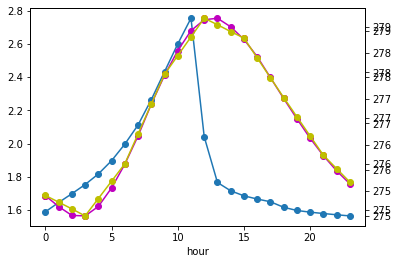

In [81]:
df_cp = df[['T_K','N50','OA']]

df_cp = df_cp.assign(hour=  df_cp.index.hour)

fig, ax = plt.subplots()
df_cp['OA'].groupby(df_cp['hour']).mean().plot(marker='o')
df_cp['T_K'].groupby(df_cp['hour']).mean().plot(marker='o', ax=ax.twinx(), c='r')
df_cp['T_K'].interpolate(method='quadratic').groupby(df_cp['hour']).mean().plot(marker='o', ax=ax.twinx(), c='m')

df_cp['T_K'].interpolate(method='linear').groupby(df_cp['hour']).mean().plot(marker='o', ax=ax.twinx(), c='y')

## Interpolate temperature quadratically before calculating density. 

In [82]:
df['T_K_interp'] = df['T_K'].interpolate(method='quadratic', limit=2)

In [83]:
df['density'] = 1e5/(R*df['T_K_interp'])
df['density_no_interp'] = 1e5/(R*df['T_K'])

<AxesSubplot:xlabel='time'>

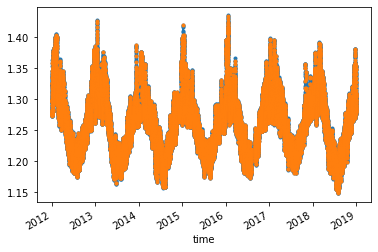

In [84]:
df['density'].plot(marker='.')
df['density_no_interp'].plot(marker='.')

<AxesSubplot:xlabel='time'>

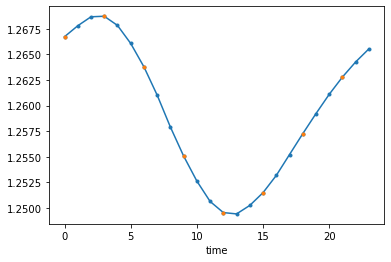

In [85]:
df['density'].groupby(df.index.hour).mean().plot(marker='.')
df['density_no_interp'].groupby(df.index.hour).mean().plot(marker='.')

In [86]:
df['ambient2stp_correction_factor'] = (1/df['density'])*standard_air_density

In [87]:
vl = ['OA','N100','N200','N50']
for v in vl:
    if v in df:
        df = df.rename({v:f'{v}_amb'}, axis=1)
        df[f'{v}_STP'] = df[f'{v}_amb']*df['ambient2stp_correction_factor']
        print(f'converting {v}')

converting OA
converting N100
converting N200
converting N50


<AxesSubplot:xlabel='time'>

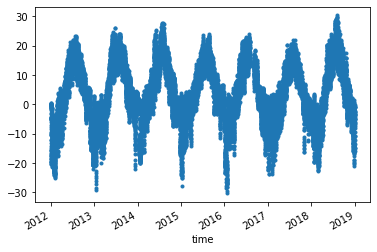

In [88]:
df['T_C'].plot(marker='.')#.columns#['Temperature'].plot()

<AxesSubplot:ylabel='Frequency'>

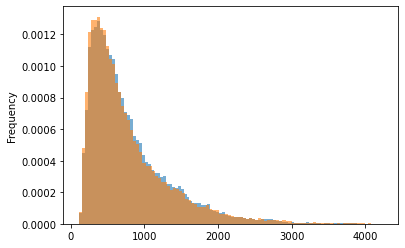

In [89]:
df['N50_STP'].plot.hist(alpha=0.6, bins=100, density=True)#.columns#['Temperature'].plot()
df['N50_amb'].plot.hist(alpha=0.6, bins=100, density=True)#.columns#['Temperature'].plot()

### Save result

In [90]:


_di = {case_name_ec_earth:df}
_dism = {case_name_ec_earth:df_sm}

dic_df_mod_case['EC-Earth']= _di.copy()
dic_dfsm_mod_case['EC-Earth'] = _dism.copy()

## Adjust UKESM:

In [91]:
ds_ukesm = dic_mod_ca['UKESM'][case_name_ukesm]

#### Check all data there: 

In [92]:
from bs_fdbck_clean.util.BSOA_datamanip.ukesm import diam_vars, num_vars

#### Time step difference in UKESM

f1 = '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/UKESM/aerocom3_UKESM_GlobalTraj-CE_Terpene_Surf_Emiss_ModelLevel_201806_3hourly_u-cr294.nc'
f2 = '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/UKESM/aerocom3_UKESM_GlobalTraj-CE_ddrymodeNS_ModelLevel_201806_3hourly_u-cr294.nc'

ds_u1 = xr.open_dataset(f1)
ds_u2 = xr.open_dataset(f2)


print('terpene emissions')
display(ds_u1)
print('terpene emissions')

display(ds_u2)


#### Adjust the emissions to be at the same timestep
The emission dataset is labelled at the beginning of each time period, the rest is in the middle. We therefore need to adjust it to fit the rest of the data. 

In [93]:
ukesm_sf_vars = ['SFisoprene','SFterpene']
ds_ukesm_sf = ds_ukesm[ukesm_sf_vars].dropna(dim='time').sel(time=slice('2012-01','2018-12'))
ds_ukesm_sf['time'].attrs['timestamp'] = 'mid'

In [94]:
if ds_ukesm_sf['time'].attrs['timestamp'] =='mid':
    ds_ukesm_sf['time'] = pd.to_datetime(ds_ukesm_sf['time'].values) - datetime.timedelta(hours=1.5)
    ds_ukesm_sf['time'].attrs['timestamp'] = 'start'

In [95]:
ds_ukesm_sf

<xarray.Dataset>
Dimensions:     (time: 20456)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-01 ... 2018-12-31T21:00:00
    lev         float32 1.0
    station     <U3 'SMR'
Data variables:
    SFisoprene  (time) float32 0.0 0.0 9.886e-14 9.492e-13 ... 0.0 0.0 0.0
    SFterpene   (time) float32 0.0 0.0 3.279e-12 1.068e-11 ... 0.0 0.0 0.0

In [96]:
ds_ukesm_dropsf = ds_ukesm.drop(ukesm_sf_vars).dropna(dim='time', )
ds_ukesm_dropsf

<xarray.Dataset>
Dimensions:          (time: 20456)
Coordinates:
  * time             (time) datetime64[ns] 2012-01-01 ... 2018-12-31T21:00:00
    lev              float32 1.0
    station          <U3 'SMR'
Data variables: (12/21)
    Mass_Conc_OM_AS  (time) float32 3.878e-11 3.498e-11 ... 5.552e-11 3.932e-11
    Mass_Conc_OM_CS  (time) float32 2.059e-13 1.888e-13 ... 1.103e-13 4.102e-14
    Mass_Conc_OM_KI  (time) float32 2.234e-10 3.986e-10 ... 2.321e-11 2.664e-11
    Mass_Conc_OM_KS  (time) float32 2.515e-13 2.451e-13 ... 3.538e-13 5.639e-14
    Mass_Conc_OM_NS  (time) float32 3.923e-16 2.555e-17 ... 6.766e-16 5.049e-16
    Temp             (time) float32 270.6 270.5 270.3 ... 271.9 274.2 274.9
    ...               ...
    mmrtr_OM_NS      (time) float32 3.054e-16 1.986e-17 ... 5.369e-16 4.043e-16
    nconcAS          (time) float32 1.095e+08 1.067e+08 ... 1.081e+08 9.58e+07
    nconcCS          (time) float32 3.227e+05 3.386e+05 ... 1.042e+06 1.413e+06
    nconcKI          (time) float32 4.502e+08 8.635e+08 ... 2.673e+07 3.906e+07
    nconcKS          (time) float32 4.314e+06 7.203e+06 ... 4.853e+06 5.192e+06
    nconcNS          (time) float32 8.999e+05 3.957e+05 ... 3.897e+06 3.983e+06

##### Merge again

In [97]:
ds_ukesm = xr.merge([ds_ukesm_dropsf,ds_ukesm_sf])
ds_ukesm

<xarray.Dataset>
Dimensions:          (time: 20456)
Coordinates:
  * time             (time) datetime64[ns] 2012-01-01 ... 2018-12-31T21:00:00
    lev              float32 1.0
    station          <U3 'SMR'
Data variables: (12/23)
    Mass_Conc_OM_AS  (time) float32 3.878e-11 3.498e-11 ... 5.552e-11 3.932e-11
    Mass_Conc_OM_CS  (time) float32 2.059e-13 1.888e-13 ... 1.103e-13 4.102e-14
    Mass_Conc_OM_KI  (time) float32 2.234e-10 3.986e-10 ... 2.321e-11 2.664e-11
    Mass_Conc_OM_KS  (time) float32 2.515e-13 2.451e-13 ... 3.538e-13 5.639e-14
    Mass_Conc_OM_NS  (time) float32 3.923e-16 2.555e-17 ... 6.766e-16 5.049e-16
    Temp             (time) float32 270.6 270.5 270.3 ... 271.9 274.2 274.9
    ...               ...
    nconcCS          (time) float32 3.227e+05 3.386e+05 ... 1.042e+06 1.413e+06
    nconcKI          (time) float32 4.502e+08 8.635e+08 ... 2.673e+07 3.906e+07
    nconcKS          (time) float32 4.314e+06 7.203e+06 ... 4.853e+06 5.192e+06
    nconcNS          (time) float32 8.999e+05 3.957e+05 ... 3.897e+06 3.983e+06
    SFisoprene       (time) float32 0.0 0.0 9.886e-14 9.492e-13 ... 0.0 0.0 0.0
    SFterpene        (time) float32 0.0 0.0 3.279e-12 1.068e-11 ... 0.0 0.0 0.0

#### Plot 

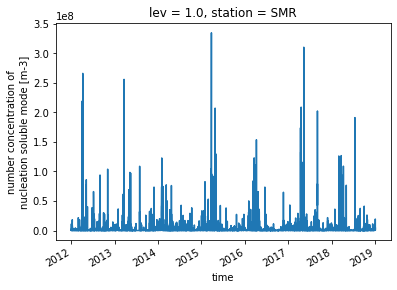

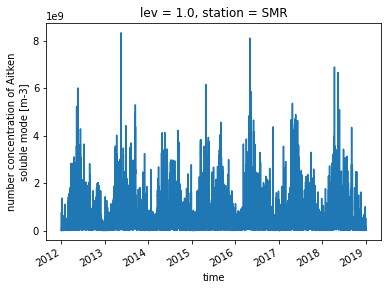

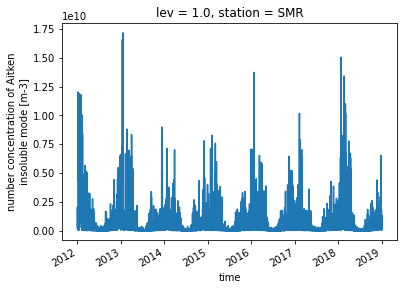

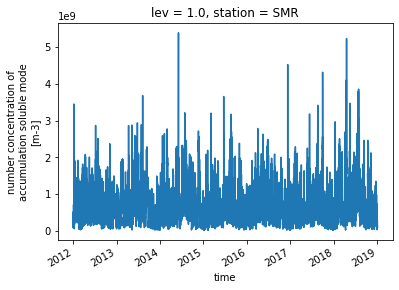

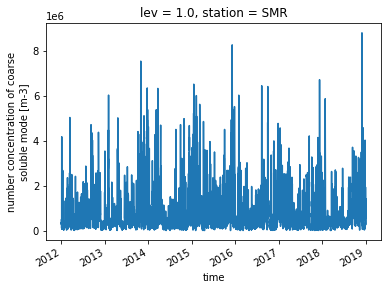

In [98]:
for n in num_vars:
    ds_ukesm[n].plot()#marker='.')
    plt.show()

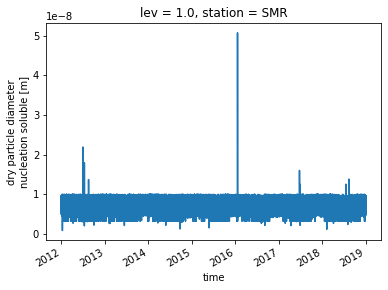

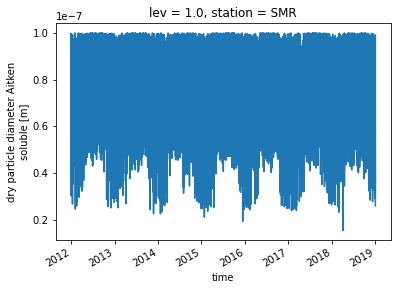

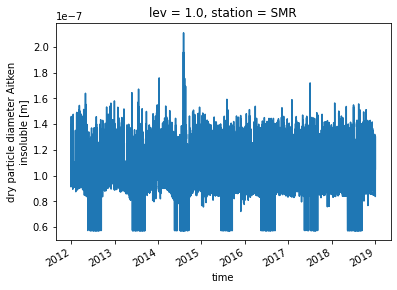

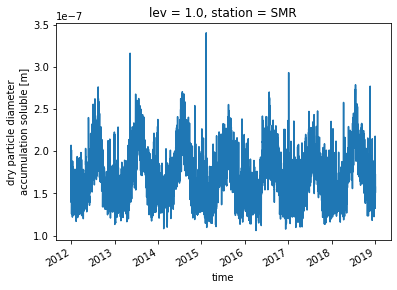

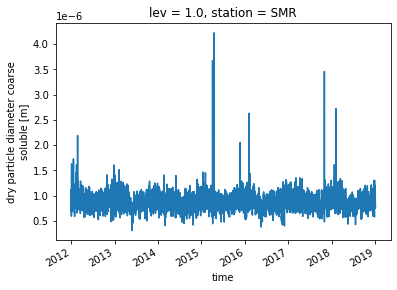

In [99]:
for n in diam_vars:
    ds_ukesm[n].plot()
    plt.show()

In [100]:
from bs_fdbck_clean.util.BSOA_datamanip.ukesm import ds2df_ukesm

In [101]:

df, df_sm = ds2df_ukesm(ds_ukesm, 
                        take_daily_median=False, 
                        #air_density=air_dens,
                        model_lev_i =model_lev_i)
#df.index = df.reset_index()['time'].apply(fix_echam_time)
df

Converting nconcNS from m-3 to cm-3
Converting nconcKS from m-3 to cm-3
Converting nconcKI from m-3 to cm-3
Converting nconcAS from m-3 to cm-3
Converting nconcCS from m-3 to cm-3
Converting ddryNS from m to nm
Converting ddryKS from m to nm
Converting ddryKI from m to nm
Converting ddryAS from m to nm
Converting ddryCS from m to nm
Converting Mass_Conc_OM_NS from kg/m3 to ug/m3
Converting Mass_Conc_OM_KS from kg/m3 to ug/m3
Converting Mass_Conc_OM_KI from kg/m3 to ug/m3
Converting Mass_Conc_OM_AS from kg/m3 to ug/m3
HEY
['Mass_Conc_OM_AS', 'Mass_Conc_OM_CS', 'Mass_Conc_OM_KI', 'Mass_Conc_OM_KS', 'Mass_Conc_OM_NS', 'T', 'ddryAS', 'ddryCS', 'ddryKI', 'ddryKS', 'ddryNS', 'mmrtr_OM_AS', 'mmrtr_OM_CS', 'mmrtr_OM_KI', 'mmrtr_OM_KS', 'mmrtr_OM_NS', 'nconcAS', 'nconcCS', 'nconcKI', 'nconcKS', 'nconcNS', 'SFisoprene', 'SFterpene', 'N50', 'N70', 'N100', 'N150', 'N200', 'N500', 'N50-500', 'N70-500', 'N100-500', 'N150-500', 'N200-500', 'OA']
{'m01s38i495': 'Mass_Conc_OM_AS', 'm01s38i496': 'Mass_C

,lev,station,Mass_Conc_OM_AS,Mass_Conc_OM_CS,Mass_Conc_OM_KI,Mass_Conc_OM_KS,Mass_Conc_OM_NS,T,ddryAS,ddryCS,...,N50-500,N70-500,N100-500,N150-500,N200-500,OA,T_C,is_JJA,is_JA,isSummer
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,1.0,SMR,0.038777,2.058902e-13,0.223428,0.000251,3.923037e-07,270.635986,200.820175,1101.896606,...,522.190772,441.993851,308.623775,158.708194,78.237737,0.262457,-2.514008,False,False,False
2012-01-01 03:00:00,1.0,SMR,0.034976,1.888150e-13,0.398608,0.000245,2.555004e-08,270.515137,204.602295,1115.824219,...,889.586871,728.780847,472.729870,212.042709,95.829907,0.433829,-2.634857,False,False,False
2012-01-01 06:00:00,1.0,SMR,0.033645,1.851501e-13,0.921809,0.000788,7.284419e-07,270.327393,205.422104,1111.169067,...,1941.411778,1560.894235,961.126695,376.569217,148.961000,0.956243,-2.822601,False,False,False
2012-01-01 09:00:00,1.0,SMR,0.035996,2.864193e-13,0.883705,0.212927,1.084581e-08,270.039062,207.048813,1074.802002,...,2035.034376,1675.578935,1066.897663,430.419858,170.792719,1.132628,-3.110931,False,False,False
2012-01-01 12:00:00,1.0,SMR,0.053992,4.926639e-13,0.393360,0.425923,1.718327e-08,270.201904,203.992630,1020.493896,...,1432.554163,1205.530610,801.048217,348.863738,147.046521,0.873275,-2.948090,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 09:00:00,1.0,SMR,0.057836,2.209024e-13,0.177403,0.090948,5.849516e-08,269.434814,173.049377,891.414856,...,568.378649,496.045401,359.601977,178.011571,76.133403,0.326186,-3.715179,False,False,False
2018-12-31 12:00:00,1.0,SMR,0.231023,3.162027e-13,0.094023,0.006718,3.723227e-08,270.139893,156.822815,810.386658,...,409.252515,380.888135,328.157560,192.461968,82.649024,0.331764,-3.010101,False,False,False
2018-12-31 15:00:00,1.0,SMR,0.187247,4.246550e-13,0.043546,0.001822,5.139916e-08,271.932373,152.859741,741.765381,...,299.296172,287.690887,252.884443,145.066797,59.532983,0.232616,-1.217621,False,False,False


### Assuming standard pressure for UKESM (since we don't have this and the effect is marginal)

Converting by: 

\begin{align}
conc. OA_{amb}=\frac{m_{OA}}{V_{amb}} = & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{amb}} = w_{OA} \cdot \rho_{amb} 
\end{align}
and in the same way
\begin{align}
conc. OA_{STP}= & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{STP}} = w_{OA} \cdot \rho_{STP}
\end{align}

So finally
\begin{align}
conc. OA_{STP}= & conc. OA_{amb} \cdot \frac{\rho_{STP}}{\rho_{amb}}
\end{align}

In [102]:
from bs_fdbck_clean.util.BSOA_datamanip import pressure_default, standard_air_density,R

In [103]:
df['T_C']

time
2012-01-01 00:00:00   -2.514008
2012-01-01 03:00:00   -2.634857
2012-01-01 06:00:00   -2.822601
2012-01-01 09:00:00   -3.110931
2012-01-01 12:00:00   -2.948090
                         ...   
2018-12-31 09:00:00   -3.715179
2018-12-31 12:00:00   -3.010101
2018-12-31 15:00:00   -1.217621
2018-12-31 18:00:00    1.012848
2018-12-31 21:00:00    1.752594
Name: T_C, Length: 20456, dtype: float32

In [104]:
df['density'] = 1e5/(R*(df['T_C']+273.15))

<AxesSubplot:xlabel='time'>

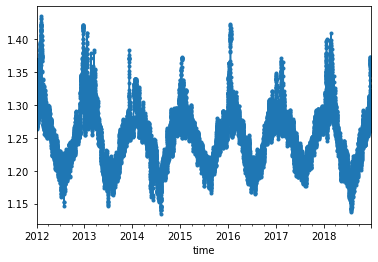

In [105]:
df['density'].plot(marker='.')

In [106]:
df['ambient2stp_correction_factor'] = (1/df['density'])*standard_air_density

In [107]:
vl = ['OA','N100','N200','N50']
for v in vl:
    if v in df:
        df = df.rename({v:f'{v}_amb'}, axis=1)
        df[f'{v}_STP'] = df[f'{v}_amb']*df['ambient2stp_correction_factor']
        print(f'converting {v}')

converting OA
converting N100
converting N200
converting N50


<AxesSubplot:xlabel='time'>

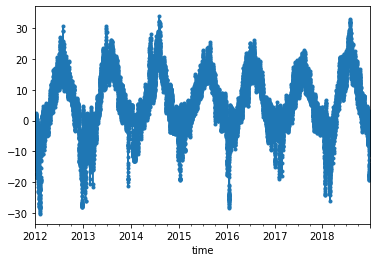

In [108]:
df['T_C'].plot(marker='.')#.columns#['Temperature'].plot()

<AxesSubplot:xlabel='time'>

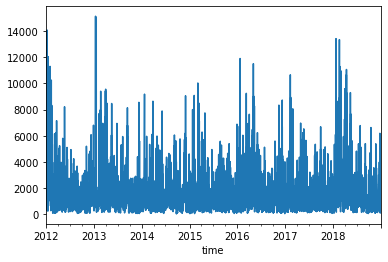

In [109]:
df['N50_STP'].plot()#.columns#['Temperature'].plot()

<AxesSubplot:ylabel='Frequency'>

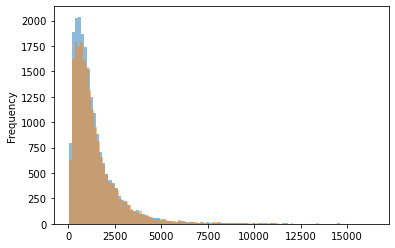

In [110]:
df['N50_amb'].plot.hist(bins=100, alpha=.5)#.columns#['Temperature'].plot()
df['N50_STP'].plot.hist(bins=100, alpha=.5)#.columns#['Temperature'].plot()

### UKESM Shift time step to start of period to be consistent with measurements and other models

In [111]:
ind = df.index
df.index = ind - datetime.timedelta(hours=1)

### Save result

In [112]:


_di = {case_name_ukesm:df}
_dism = {case_name_ukesm:df_sm}

dic_df_mod_case['UKESM']= _di.copy()
dic_dfsm_mod_case['UKESM'] = _dism.copy()

## Adjust NorESM

In [113]:
ds_noresm = dic_mod_ca['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']

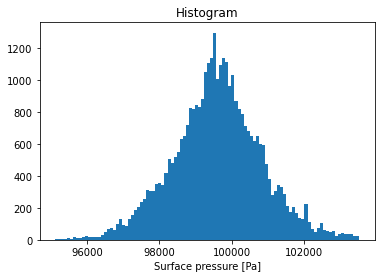

In [114]:
ds['PS'].sel(station=select_station).plot.hist(bins=100);

In [115]:
air_dens = ds_noresm['PS']/(R*ds_noresm['T'])

### Run ds2df NorESM

In [116]:
dic_df = ds2df_inc_preprocessing(dic_mod_ca['NorESM'], 
                                            model_lev_i=model_lev_i, 
                                            air_density=standard_air_density,
                                            select_hours_clouds=False,
                                            mask_cloud_values = False,
#                   from_hour=8,
#                   to_hour=14,
#                   varl_cl=None,
#                   varl_st = None,
          mask_summer = False,
                                            return_summer_median=False, 
                                            take_daily_median=False
                                )


dic_df_mod_case['NorESM'] = dic_df.copy()

hey
SO4_A1
SO4_A2
SO4_AC
SO4_NA
SO4_PR
df1


<AxesSubplot:xlabel='time'>

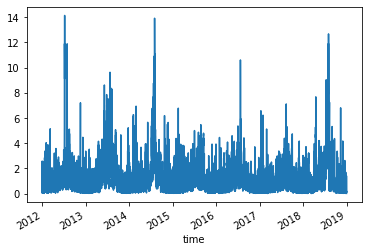

In [117]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']['OA'].plot()

<AxesSubplot:xlabel='time'>

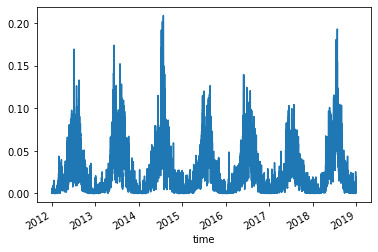

In [118]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']['SOA_NA'].plot()

### NorESM needs correcting only for number concentrations

Converting by: 

\begin{align}
conc. OA_{amb}=\frac{m_{OA}}{V_{amb}} = & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{amb}} = w_{OA} \cdot \rho_{amb} 
\end{align}
and in the same way
\begin{align}
conc. OA_{STP}= & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{STP}} = w_{OA} \cdot \rho_{STP}
\end{align}

So finally
\begin{align}
conc. OA_{STP}= & conc. OA_{amb} \cdot \frac{\rho_{STP}}{\rho_{amb}}
\end{align}

In [119]:
from bs_fdbck_clean.util.BSOA_datamanip import pressure_default, standard_air_density,R

In [120]:
df = dic_df_mod_case['NorESM'][case_noresm]

In [121]:
if 'OA' in df.columns:
    df = df.rename({'OA':'OA_STP'}, axis=1)

In [122]:
pressure = df['PS']
temperature = df['T_C']

In [123]:
df['density'] = pressure/(R*(temperature+273.15))

<AxesSubplot:xlabel='time'>

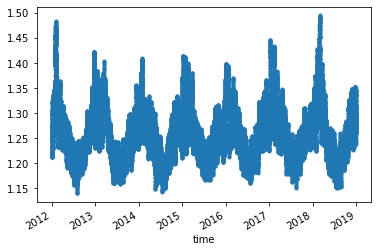

In [124]:
df['density'].plot(marker='.')

In [125]:
df['ambient2stp_correction_factor'] = (1/df['density'])*standard_air_density

In [126]:
vl = ['N100','N200','N50']
for v in vl:
    if v in df:
        df = df.rename({v:f'{v}_amb'}, axis=1)
        df[f'{v}_STP'] = df[f'{v}_amb']*df['ambient2stp_correction_factor']
        print(f'converting {v}')

converting N100
converting N200
converting N50


### NorESM Shift time step to start of period to be consistent with measurements and other models

In [127]:
ind = df.index
df.index = ind - datetime.timedelta(hours=1)

In [128]:
dic_df_mod_case['NorESM'][case_noresm] = df

## ALL MODELS: SHIFT TIME to local time: Easter european winter time EET UTC+2

In [129]:
import datetime

In [130]:
for mo in models:
    for ca in di_mod2cases[mo]:
        ind = dic_df_mod_case[mo][ca].index
        dic_df_mod_case[mo][ca].index = ind + datetime.timedelta(hours=2)

In [131]:
for mo in models:
    for ca in di_mod2cases[mo]:

        print(dic_df_mod_case[mo][ca].index[0:4])

DatetimeIndex(['2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-01-02 01:00:00', '2012-01-02 02:00:00',
               '2012-01-02 03:00:00', '2012-01-02 04:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-01-01 01:00:00', '2012-01-01 04:00:00',
               '2012-01-01 07:00:00', '2012-01-01 10:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)


## Write to file:

In [132]:
for mod in models:
    print(mod)
    dic_df_mod_case[mod]
    for ca in dic_df_mod_case[mod].keys():
        print(mod, ca)
        fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        if model_lev_i !=-1:
            fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}_ilev{model_lev_i}.csv'
        else:
            fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_mod_case[mod][ca].to_csv(fn_out)

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/SMR/SMR_station_ECHAM-SALSA_SALSA_BSOA_feedback.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/SMR/SMR_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp.csv
EC-Earth
EC-Earth ECE3_output_Sara
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/SMR/SMR_station_EC-Earth_ECE3_output_Sara.csv
UKESM
UKESM AEROCOMTRAJ
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/SMR/SMR_station_UKESM_AEROCOMTRAJ.csv


<AxesSubplot:xlabel='time'>

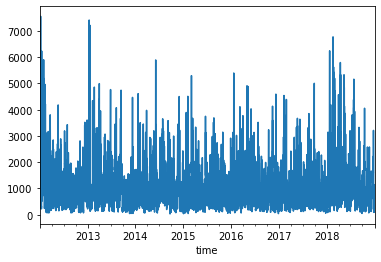

In [133]:
dic_df_mod_case[mod][ca]['N100_STP'].plot()